In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [30]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()


In [31]:
train_images, test_images = train_images / 255.0, test_images / 255.0


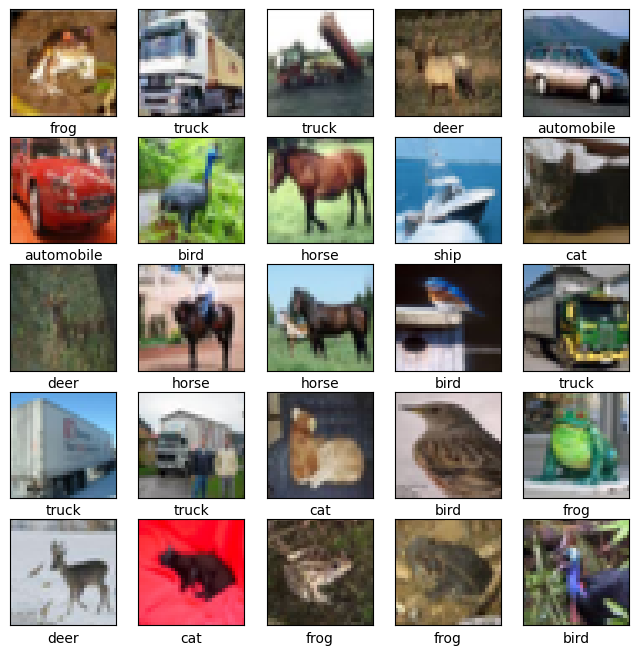

In [32]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [33]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [34]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])


In [35]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), batch_size = 128)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.2989 - loss: 1.9093 - val_accuracy: 0.4848 - val_loss: 1.4317
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.5228 - loss: 1.3349 - val_accuracy: 0.5767 - val_loss: 1.1901
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.5965 - loss: 1.1575 - val_accuracy: 0.6047 - val_loss: 1.1116
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.6307 - loss: 1.0593 - val_accuracy: 0.6054 - val_loss: 1.1340
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.6523 - loss: 0.9865 - val_accuracy: 0.6626 - val_loss: 0.9649
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.6737 - loss: 0.9256 - val_accuracy: 0.6568 - val_loss: 0.9798
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.6951 - loss: 0.8762 - val_accuracy: 0.6757 - val_loss: 0.9247
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.7100 - loss: 0.8251

313/313 - 3s - 8ms/step - accuracy: 0.7059 - loss: 0.8475


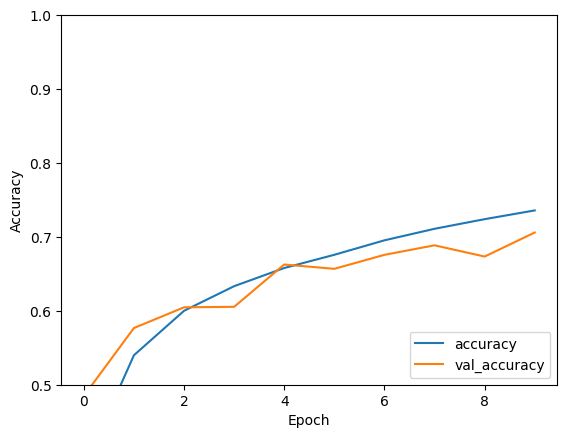

In [36]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [37]:
print('Test Accuracy is',test_acc)


Test Accuracy is 0.7059000134468079
